# Skipgram Model


In [26]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/nlp/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Reading Sentences from JSON File and splitting to tokens

In [36]:
f = open(root_path+"reviews_Electronics_5.json",)
u=50000
sentences=""
while u>0:
  line= f.readline()
  dic=eval(line)
  sentences+=dic['reviewText'].lower()
  u=u-1
print(len(sentences))
sentences=sentences.split()
# print(sentences)

467112


Removing Numericals and stopwords and blank tokens




In [37]:
import string
from collections import defaultdict 
from spacy.lang.en.stop_words import STOP_WORDS
table = str.maketrans('', '', string.punctuation)
corpus = [w.translate(table) for w in sentences]
def hasNumbers(inputString):
  return any(char.isdigit() for char in inputString)
for i in corpus:
  if hasNumbers(i):
    corpus.remove(i)
  elif i in STOP_WORDS:
    corpus.remove(i)
  elif i == "":
    corpus.remove(i)

# print(corpus)
print("Total words: {}".format(len(corpus)))
print("Unique words: {}".format(len(set(corpus))))



Total words: 54200
Unique words: 7399


# Subsampling



In [38]:
c=defaultdict(int)
for i in corpus:
  c[i] +=1
import numpy as np
def subsampling(corpus):
  new_corpus=[]
  for w in corpus:
    cnt=c[w]
    freq=cnt/len(corpus)
    prob = (np.sqrt(freq/0.001) + 1) * (0.001/freq)
    if np.random.random() < prob:   #generates random number (0,1)
      new_corpus.append(w)
  return new_corpus

corpus=subsampling(corpus)
# print(corpus)
print("Total words: {}".format(len(corpus)))
print("Unique words: {}".format(len(set(corpus))))

Total words: 46857
Unique words: 7399


In [39]:
c3=defaultdict(int)
for i in corpus:
  c3[i] +=1
# print(c3)

Removing Less frequent Words

In [40]:
for i in corpus:
  if c3[i] < 8:
    corpus.remove(i)

c=defaultdict(int)
for i in corpus:
  c[i] +=1
# print(c)
c1=sorted(c.keys())
vocab = defaultdict(int)
for i in range(len(c1)): 
  vocab[c1[i]]=i
print("Total words: {}".format(len(corpus)))
print("Unique words: {}".format(len(set(corpus))))
V=len(vocab)
# print(vocab)
print(V)

Total words: 38111
Unique words: 3017
3017


# One Hot encoding of context and centerwords



In [41]:
# sg=skipgram()
x_train=[]
y_train=[]
window_size=5
for i in range(len(corpus)):
  w1=[0 for x in range(V)]
  w1[vocab[corpus[i]]]=1
  w2=[0 for x in range(V)]
  for j in range(i-window_size,i+window_size+1):
    if i!=j and j>=0 and j<len(corpus):
      w2[vocab[corpus[j]]]=1
  x_train.append(w1)
  y_train.append(w2)



# Softmax formula

In [42]:
def softmax(x):
	e_x = np.exp(x - np.max(x)) 
	return e_x / e_x.sum() 

# Training Data and My Skipgram Training

In [43]:
epochs=4
N=20
alpha=0.0002
W = np.random.uniform(-0.8, 0.8, (V, N))
W1 = np.random.uniform(-0.8, 0.8, (N, V))
print(W.shape)

for x in range(1,epochs):
  loss=0
  # print(x)
  for j in range(len(x_train)):
    if(j%1000==0):
      print("j",j)
    #forward
    h = np.dot(W.T,x_train[j]).reshape(N,1) #w is center weight , X_train is center word
    u = np.dot(W1.T,h) # w1=context weight
    y = softmax(u) 
    #backward
    e = y - np.asarray(y_train[j]).reshape(V,1)   #error of all context words
    dLdW1 = np.dot(h,e.T) # delta context weights
    X = np.array(x_train[j]).reshape(V,1) 
    dLdW = np.dot(X, np.dot(W1,e).T) # delta embedding weights
    W1 = W1 - alpha*dLdW1 
    W = W - alpha*dLdW 
    c1=0
    for m in range(V):
      if(y_train[j][m]):
        loss+= -1*u[m][0]
        c1 += 1
    loss += c1*np.log(np.sum(np.exp(u)))
  print("epoch ",x, " loss = ",loss)
  # alpha *= 1/( (1+alpha*x))    

(3017, 20)
j 0
j 1000
j 2000
j 3000
j 4000
j 5000
j 6000
j 7000
j 8000
j 9000
j 10000
j 11000
j 12000
j 13000
j 14000
j 15000
j 16000
j 17000
j 18000
j 19000
j 20000
j 21000
j 22000
j 23000
j 24000
j 25000
j 26000
j 27000
j 28000
j 29000
j 30000
j 31000
j 32000
j 33000
j 34000
j 35000
j 36000
j 37000
j 38000
epoch  1  loss =  3109006.515781254
j 0
j 1000
j 2000
j 3000
j 4000
j 5000
j 6000
j 7000
j 8000
j 9000
j 10000
j 11000
j 12000
j 13000
j 14000
j 15000
j 16000
j 17000
j 18000
j 19000
j 20000
j 21000
j 22000
j 23000
j 24000
j 25000
j 26000
j 27000
j 28000
j 29000
j 30000
j 31000
j 32000
j 33000
j 34000
j 35000
j 36000
j 37000
j 38000
epoch  2  loss =  3105943.2374076825
j 0
j 1000
j 2000
j 3000
j 4000
j 5000
j 6000
j 7000
j 8000
j 9000
j 10000
j 11000
j 12000
j 13000
j 14000
j 15000
j 16000
j 17000
j 18000
j 19000
j 20000
j 21000
j 22000
j 23000
j 24000
j 25000
j 26000
j 27000
j 28000
j 29000
j 30000
j 31000
j 32000
j 33000
j 34000
j 35000
j 36000
j 37000
j 38000
epoch  3  loss =  3

# TSNE and Cosine similarity of word=Home and printing 10 closest words

In [ ]:
neighbours=10
wrd="home"
target_vectors=[]
word_vector=[]
if wrd in corpus:
  X = [0 for i in range(V)] 
  X[vocab[wrd]] = 1
  h = np.dot(W.T,X).reshape(N,1) 
  word_vector=h
  u = np.dot(W1.T,h) 
  y = softmax(u)
  output = {} 
  for i in range(V): 
    output[y[i][0]] = i 
  # print(output)
  # print(sorted(output,reverse=True))
  top_context_words = [] 
  for k in sorted(output,reverse=True):
    # print("k",k)
    # print(output[k])
    wrd2=corpus[output[k]]
    # print(wrd2)
    y = [0 for i in range(V)] 
    y[vocab[wrd2]] = 1
    h1 = np.dot(W.T,y).reshape(N,1)
    target_vectors.append(h1)
    top_context_words.append(corpus[output[k]]) 
    if(len(top_context_words)>=neighbours): 
      break
  print(top_context_words) 
else: 
  print("Word not found in dicitonary") 

from numpy import dot
from numpy.linalg import norm

def cos(a,b):
  return dot(a, b)/(norm(a)*norm(b))

def flat(l):
  flat_list = []
  for sublist in l:
    for item in sublist:
      flat_list.append(item)
  return flat_list

# print(target_vectors[0])
print(wrd,cos(flat(word_vector),flat(word_vector)))
for i in range(len(target_vectors)):
  print(top_context_words[i],cos(flat(word_vector),flat(target_vectors[i])))

# TSNE

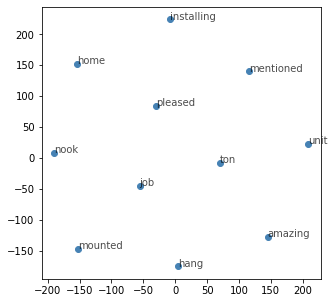

In [46]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
top_context_words.append(wrd)
target_vectors.append(h1) 

tsne = TSNE()
tv=[]
for i in target_vectors:
  tv.append(flat(i))
embed_tsne = tsne.fit_transform(tv)

fig, ax = plt.subplots(figsize=(5, 5))
for idx in range(len(target_vectors)):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(top_context_words[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)


# Gensim Comparison with word vector error calculation

In [47]:
from gensim.models import Word2Vec
import gensim.downloader as api
corpus = api.load('text8')
model = Word2Vec(corpus)

gensim_vec = model.wv[wrd]
print("The Mean Error between Gensim Embedding and My Embedding for The word",wrd)
print((np.square(gensim_vec - word_vector)).mean())

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


The Mean Error between Gensim Embedding and My Embedding for The word home
2.166143722306206
